{'0': [('0x8d09', '0x9e1c'), ('0x02e8', '0x8d09'), ('0x02e8', '0x8d09'), ('0xdde1', '0x02e8'), ('0xdde1', '0x02e8'), ('0xce63', '0xdde1'), ('0xce63', '0xdde1'), ('0x34d9', '0xce63'), ('0x34d9', '0xce63'), ('0x75fb', '0x34d9'), ('0x75fb', '0x34d9'), ('0x9720', '0x75fb'), ('0x9720', '0x75fb'), ('0x2e47', '0x9720'), ('0x2e47', '0x9720'), ('0xd2a7', '0x2e47'), ('0xd2a7', '0x2e47'), ('0xc59a', '0xd2a7'), ('0xc59a', '0xd2a7'), ('0x84e1', '0xc59a'), ('0x84e1', '0xc59a'), ('0x775e', '0x84e1'), ('0x775e', '0x84e1'), ('0x013c', '0x775e'), ('0x013c', '0x775e'), ('0xc06b', '0x013c'), ('0xc06b', '0x013c'), ('0x8dd6', '0xc06b'), ('0x8dd6', '0xc06b'), ('0x6140', '0x8dd6'), ('0x6140', '0x8dd6'), ('0xf140', '0x6140'), ('0xf140', '0x6140'), ('0x1283', '0xf140'), ('0x1283', '0xf140'), ('0x953e', '0x1283'), ('0x953e', '0x1283'), ('0x8cc9', '0x953e'), ('0x8cc9', '0x953e'), ('0x4cff', '0x8cc9'), ('0x4cff', '0x8cc9')], '1': [('0x7032', '0x9e1c'), ('0xe28f', '0x7032'), ('0xe28f', '0x7032'), ('0x06f3', '0xe28f

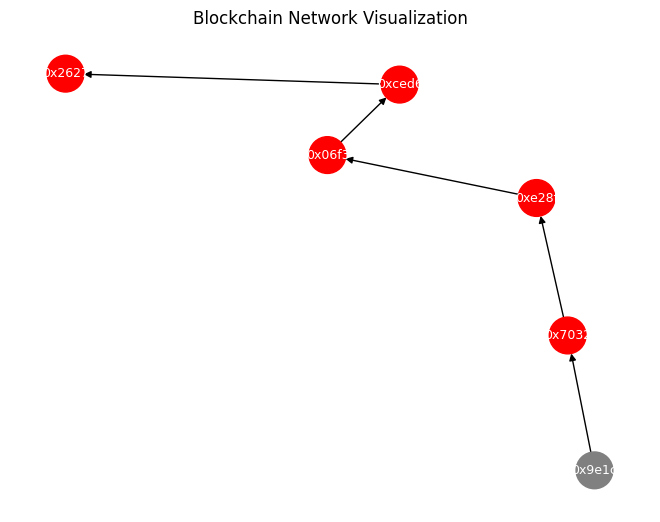

In [2]:
import matplotlib.pyplot as plt
import networkx as nx
with open('blockchain_log.txt') as f:
    lines = f.readlines()

blocks = {'0': [], '1': [], '2': [], '3': []}

# Log by peer 0: Block Hash: 0xb5a6 Prev Hash: 0x0000 Block Miner: 0 Block Height: 1 Timestamp: 1
# ['peer', '0', 'BlockHash:', '0xb5a6', 'PrevHash:', '0x0000', 'BlockMiner:', '0', 'BlockHeight:', '1', 'Timestamp:', '1']
for line in lines:
    # print(line.split())
    ldata=line.split()
    num=ldata[1]
    block_hash=ldata[3]
    prev_hash=ldata[5]
    blocks[num].append((block_hash, prev_hash))

print(blocks)
    
# Initialize the directed graph
G = nx.DiGraph()

# Define colors for each peer
colors = {'0': 'red', '1': 'blue', '2': 'green', '3': 'yellow'}
node_colors = []

# Genesis block
# genesis_hash = '0x0000'
# G.add_node(genesis_hash, color='gray')





for block_hash, prev_hash in blocks['1']:
    G.add_node(block_hash)
    G.nodes[block_hash]['color'] = colors['0']
    G.add_edge(prev_hash, block_hash)


# Collect colors for all nodes (default gray for the genesis)
node_colors = [G.nodes[node].get('color', 'gray') for node in G.nodes]

# Plotting
pos = nx.spring_layout(G, seed=42)  # positions for all nodes
nx.draw(G, pos, with_labels=True, node_color=node_colors, edge_color='black', node_size=700, font_size=9, font_color='white')

# Display the plot
plt.title('Blockchain Network Visualization')
plt.show()
